# Data preparation

## Prepare and save data

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

cancer_type = ["bladder", "brain", "breast", "bronchus_and_lung", "colon", "corpus_uteri", 
               "hematopoietic_and_reticuloendothelial_systems", "kidney",
               "liver_and_intrahepatic_bile_ducts", "ovary", "prostate_gland", "skin", 
               "stomach", "thyroid_gland"]
path = "/content/drive/MyDrive/data/tcga/{}/{}.tsv"
tcga_data = {}

for sample in cancer_type:
  tcga_data[sample] = pd.read_csv(path.format(sample, sample), sep="\t").set_index('gene_id')
  print(sample, tcga_data[sample].shape)

bladder (60660, 431)
brain (60660, 711)
breast (60660, 1232)
bronchus_and_lung (60660, 1154)
colon (60660, 527)
corpus_uteri (60660, 581)
hematopoietic_and_reticuloendothelial_systems (60660, 3967)
kidney (60660, 1030)
liver_and_intrahepatic_bile_ducts (60660, 468)
ovary (60660, 430)
prostate_gland (60660, 554)
skin (60660, 474)
stomach (60660, 454)
thyroid_gland (60660, 574)


In [3]:
gtex_v8 = (pd.read_table('/content/drive/MyDrive/data/gtex/healthy/gtex_v8.tsv.gz', sep='\t')
          .rename(columns={"Name": "gene_id"})
          .set_index('gene_id')
          .drop(['Description'], axis=1)
        )

In [4]:
import pickle

with open('/content/drive/MyDrive/data/gene_intersect.txt','rb') as f:
   gene_intersect = pickle.load(f)

# cut gene intersection beacause of lack memory
gene_intersect = list(gene_intersect)[:17424]

for (name, sample) in tcga_data.items():
  tcga_data[name] = sample[sample.index.isin(list(gene_intersect))].T

gtex_v8 = gtex_v8[gtex_v8.index.isin(list(gene_intersect))].T.sample(n=3967, random_state=42)

In [5]:
for (name, sample) in tcga_data.items():
  tcga_data[name]['label'] = [name for _ in range(len(tcga_data[name]))]

gtex_v8['label'] = ['healthy' for _ in range(len(gtex_v8))]

In [6]:
result = pd.concat([*list(tcga_data.values()), gtex_v8])
result = result.sample(frac=1)
print(result.shape)
result

(16554, 17425)


gene_id,ENSG00000002549.12,ENSG00000003137.8,ENSG00000004777.18,ENSG00000004846.16,ENSG00000007255.10,ENSG00000008130.15,ENSG00000008277.14,ENSG00000009694.13,ENSG00000010327.10,ENSG00000011332.19,...,ENSG00000284546.1,ENSG00000284550.1,ENSG00000284558.1,ENSG00000284564.1,ENSG00000284575.1,ENSG00000284584.1,ENSG00000284587.1,ENSG00000284596.1,ENSG00000284600.1,label
f6c60113-8a55-48fc-85b5-46bf99db08f8,81.5560,4.2385,6.4074,0.0621,111.7224,41.5421,4.9029,15.2006,8.9164,0.5984,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.0741,prostate_gland
c2184cbf-b455-4401-934a-64b384ed3e4e,41.5288,0.0000,24.5852,0.1320,24.7602,160.6970,3.3566,11.8950,127.0544,0.6111,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,hematopoietic_and_reticuloendothelial_systems
4d593389-e784-4a3d-8055-c5f83e7c3b06,40.1316,0.0465,34.7465,0.0126,112.9904,56.9674,0.9358,2.7640,362.8807,1.0435,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.0676,hematopoietic_and_reticuloendothelial_systems
04bffc02-6021-44e8-98af-11694675f8a2,69.2749,1.3765,26.9630,0.0132,49.3420,42.9824,0.5927,0.2091,10.3664,12.6289,...,0.0,0.0,0.0,0.0,0.4695,0.000,0.0,0.0,0.0000,ovary
e2221eba-2975-4efc-84bb-341f66a76708,69.2867,1.2913,4.1325,0.0122,54.6231,28.0656,1.0340,12.6940,7.3715,0.0821,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,thyroid_gland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968c4aa2-2bcd-4823-b7fa-fbedc41ddb25,119.2320,4.3311,11.3866,0.0078,44.4720,67.0693,1.2600,1.2926,35.8077,0.1654,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,bronchus_and_lung
46ef57a2-e2ce-4ffe-9ce8-c043c6065863,138.1373,2.4841,1.6816,0.0269,62.6223,35.5168,1.7973,0.2898,7.9890,0.2336,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.1447,bronchus_and_lung
9e294ad8-264d-43a2-b9d2-02aa3307bf19,12.5584,0.0000,15.6746,0.0132,29.0187,178.0227,3.8061,5.4054,130.8512,0.1787,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.0000,hematopoietic_and_reticuloendothelial_systems
df2baefb-4c65-420d-af0a-3f28608ce5b4,83.0045,5.9787,30.0758,0.0000,69.5730,28.7904,44.3776,1.9942,9.8208,16.5628,...,0.0,0.0,0.0,0.0,0.0000,0.000,0.0,0.0,0.0359,brain


In [7]:
result.to_csv('result.tsv.gz', sep='\t', compression='gzip')

## Load Data *

In [5]:
import pandas as pd

result = pd.read_csv('/content/drive/MyDrive/data/result_undersampling.tsv.gz', sep='\t').set_index('Unnamed: 0')

# Learning a model

## Data to tensor *

In [6]:
import torch
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Data preprocessing
X = torch.tensor(result.drop(['label'], axis=1).values)
scaler = MinMaxScaler()
scaler.fit(X)
X = torch.tensor(scaler.transform(X))

# Labels preprocessing
labels = result['label'].values
le = LabelEncoder()
targets = le.fit_transform(labels)
y = torch.as_tensor(targets)

In [7]:
# %% Imports
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Set GPU device
if(torch.cuda.is_available()):
  device = torch.device("cuda:0")
  print(torch.cuda.is_available())

True


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

<ipython-input-8-4ac68a4ade38>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-8-4ac68a4ade38>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-8-4ac68a4ade38>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
<ipython-input-8-4ac68a4ade38>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor

## Create a model

In [11]:
# Define the model
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, 256),
            nn.Linear(256, 128),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        out = self.fc1(x)
        return out

model = Classifier(input_size=X.shape[1], num_classes=len(y.unique()))
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.eval()

Classifier(
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=17424, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=15, bias=True)
  )
)

## Learning model

In [12]:
# Train the model
train_loss = []
test_loss = []

num_epochs = 1000
for epoch in range(num_epochs):
    # Predict
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    train_loss.append(loss.item())
    # Train
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Test
    with torch.no_grad():
      outputs = model(X_test)
      loss = criterion(outputs, y_test)
      test_loss.append(loss.item())

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.10f}'.format(epoch+1, num_epochs, loss.item()))

# Test the model
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print('Test Accuracy: {:.10f}%'.format(accuracy * 100))

Epoch [100/1000], Loss: 0.0608616322
Epoch [200/1000], Loss: 0.0561047643
Epoch [300/1000], Loss: 0.0571259297
Epoch [400/1000], Loss: 0.0586825199
Epoch [500/1000], Loss: 0.0601894818
Epoch [600/1000], Loss: 0.0614914969
Epoch [700/1000], Loss: 0.0625914037
Epoch [800/1000], Loss: 0.0635704100
Epoch [900/1000], Loss: 0.0644757226
Epoch [1000/1000], Loss: 0.0653244779
Test Accuracy: 99.3355481728%


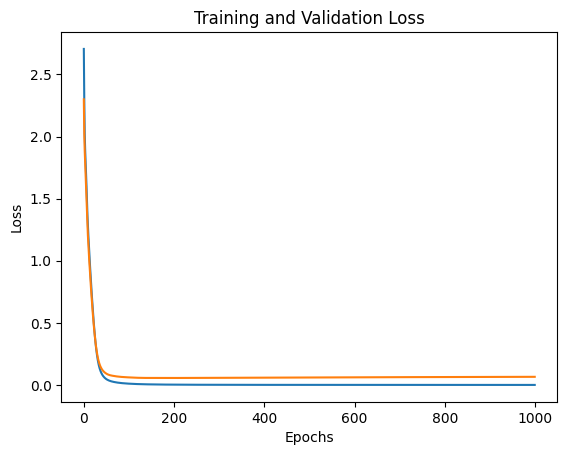

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_loss[:], label='Training Loss')
plt.plot(test_loss[:], label='Validation Loss')
 
# Add in a title and axes labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

## Save Model

In [14]:
torch.save(model.state_dict(), '/content/drive/MyDrive/model/classifier_adam_error.pt')
model.eval()

Classifier(
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=17424, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=15, bias=True)
  )
)

## Load Model *

In [9]:
# Define the model
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_size, 256),
            nn.Linear(256, 128),
            nn.Linear(128, num_classes)
        )
        
    def forward(self, x):
        out = self.fc1(x)
        return out

model = Classifier(input_size=17424, num_classes=15)
model.load_state_dict(torch.load('/content/drive/MyDrive/model/classifier_adam_error.pt'))
model.eval()

Classifier(
  (fc1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=17424, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=15, bias=True)
  )
)

# LRP *

In [11]:
import copy

def get_linear_layer_indices(model):
    indices = []
    for i, layer in enumerate(model.fc1): 
        if isinstance(layer, nn.Linear): 
            indices.append(i)
    indices = [val for val in indices]
    return indices

def new_layer(layer, g):
    """Clone a layer and pass its parameters through the function g."""
    layer = copy.deepcopy(layer)
    try: layer.weight = torch.nn.Parameter(g(layer.weight))
    except AttributeError: pass
    try: layer.bias = torch.nn.Parameter(g(layer.bias))
    except AttributeError: pass
    return layer

def apply_lrp_on_classifier(model, image):
    image = torch.unsqueeze(image, 0)
    # >>> Step 1: Extract layers
    layers = list(model.fc1)
    linear_layer_indices = get_linear_layer_indices(model)

    # >>> Step 2: Propagate image through layers and store activations
    n_layers = len(layers)
    activations = [image] + [None] * n_layers

    for layer in range(n_layers):
        activation = layers[layer].forward(activations[layer])
        activations[layer+1] = activation

    # >>> Step 3: Replace last layer with one-hot-encoding
    output_activation = activations[-1].detach().cpu().numpy()
    max_activation = output_activation.max()
    one_hot_output = [val if val == max_activation else 0 
                        for val in output_activation[0]]

    activations[-1] = torch.FloatTensor([one_hot_output]) # .to(device)

    # >>> Step 4: Backpropagate relevance scores
    relevances = [None] * n_layers + [activations[-1]]
    # Iterate over the layers in reverse order
    for layer in range(0, n_layers)[::-1]:
        current = layers[layer]
        if isinstance(current, torch.nn.Linear):
            activations[layer] = activations[layer].data.requires_grad_(True)

            # Apply variants of LRP depending on the depth
            # see: https://link.springer.com/chapter/10.1007%2F978-3-030-28954-6_10
            # Lower layers, LRP-gamma >> Favor positive contributions (activations)
            if layer <= 16:       rho = lambda p: p + 0.25*p.clamp(min=0); incr = lambda z: z+1e-9
            # Middle layers, LRP-epsilon >> Remove some noise / Only most salient factors survive
            if 17 <= layer <= 30: rho = lambda p: p;                       incr = lambda z: z+1e-9+0.25*((z**2).mean()**.5).data
            # Upper Layers, LRP-0 >> Basic rule
            if layer >= 31:       rho = lambda p: p;                       incr = lambda z: z+1e-9

            # Transform weights of layer and execute forward pass
            z = incr(new_layer(layers[layer],rho).forward(activations[layer]))
            # Element-wise division between relevance of the next layer and z
            s = (relevances[layer+1]/z).data                                     
            # Calculate the gradient and multiply it by the activation
            (z * s).sum().backward(); 
            c = activations[layer].grad       
            # Assign new relevance values           
            relevances[layer] = (activations[layer]*c).data                          
        else:
            relevances[layer] = relevances[layer+1]
    return relevances[0]

In [12]:
# # Test the model
# sample_number = 47

# outputs = model(X_test[sample_number].unsqueeze(0))
# _, predicted = torch.max(outputs.data, 1)
# if(predicted == y_test[sample_number]):
#   print(f'Prediction is True: {le.inverse_transform(predicted)[0]}')
#   first_layer = apply_lrp_on_classifier(model, X_test[sample_number])
#   print(first_layer.shape)

# Statistic


In [15]:
import pickle

with open('/content/drive/MyDrive/data/gene_intersect.txt','rb') as f:
   gene_intersect = pickle.load(f)

# cut gene intersection beacause of lack memory
gene_intersect = list(gene_intersect)[:17424]

In [13]:
import numpy as np

def get_total_samples(tissue = 'healthy'):
  return list(le.inverse_transform(y_test)).count(tissue)


def get_tissue_stat(tissue_name = 'healthy', top_values=30):
  print(f'Total samples with label {tissue_name} is {get_total_samples(tissue_name)}')

  tissue_number = le.transform([tissue_name])[0]
  total_list_genes = []

  for sample, label in zip(X_test, y_test):
    if label == tissue_number:
      outputs = model(sample.unsqueeze(0))
      _, predicted = torch.max(outputs.data, 1)
      if(predicted == label):
        first_layer = apply_lrp_on_classifier(model, sample)
        res = np.take(gene_intersect, torch.topk(abs(first_layer), 100, largest=True)[1])
        total_list_genes += list(*res)
      else:
        print(f'Prediction is False. Expect:{tissue_name} Actual:{le.inverse_transform(predicted)[0]}')
  return total_list_genes

In [16]:
cancer_type = ["bladder", "brain", "breast", "bronchus_and_lung", "colon", "corpus_uteri", 
               "hematopoietic_and_reticuloendothelial_systems", "kidney",
               "liver_and_intrahepatic_bile_ducts", "ovary", "prostate_gland", "skin", 
               "stomach", "thyroid_gland"]
cancer_type_data = {}
healthy_data = {}

if True:
  total_list_affected_genes = get_tissue_stat('healthy', 1700)
  sorted_dict = pd.Series(total_list_affected_genes).value_counts(sort=True)
  healthy_data['healthy'] = sorted_dict

for cancer_name in cancer_type:
  total_list_affected_genes = get_tissue_stat(cancer_name, 1700)
  sorted_dict = pd.Series(total_list_affected_genes).value_counts(sort=True)
  cancer_type_data[cancer_name] = sorted_dict

Total samples with label bladder is 95
Prediction is False. Expect:0 Actual:colon
Prediction is False. Expect:0 Actual:stomach
Prediction is False. Expect:0 Actual:stomach
Prediction is False. Expect:0 Actual:bronchus_and_lung
Total samples with label brain is 149
Prediction is False. Expect:1 Actual:breast
Prediction is False. Expect:1 Actual:kidney
Total samples with label breast is 261
Prediction is False. Expect:2 Actual:healthy
Total samples with label bronchus_and_lung is 220
Prediction is False. Expect:3 Actual:bladder
Total samples with label colon is 102
Prediction is False. Expect:4 Actual:stomach
Prediction is False. Expect:4 Actual:bladder
Prediction is False. Expect:4 Actual:stomach
Prediction is False. Expect:4 Actual:stomach
Total samples with label corpus_uteri is 112
Prediction is False. Expect:5 Actual:breast
Total samples with label hematopoietic_and_reticuloendothelial_systems is 794
Total samples with label kidney is 198
Prediction is False. Expect:8 Actual:hematop

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

mkdir: cannot create directory ‘/content/gene’: File exists


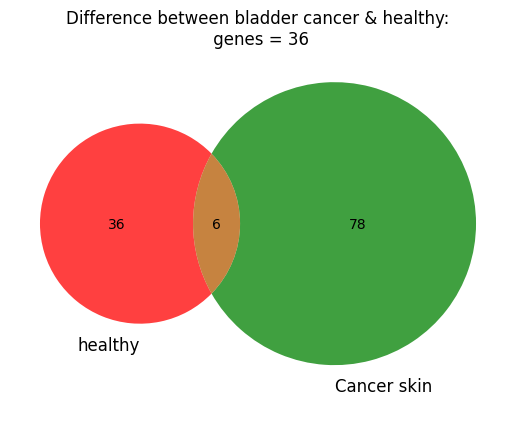

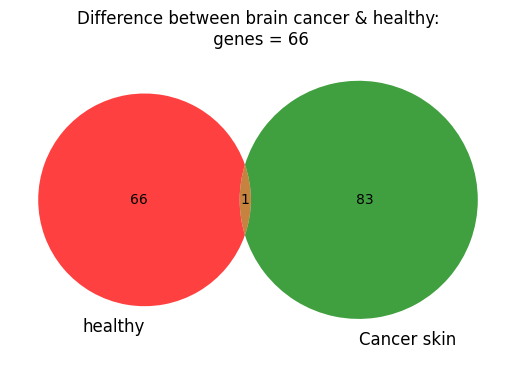

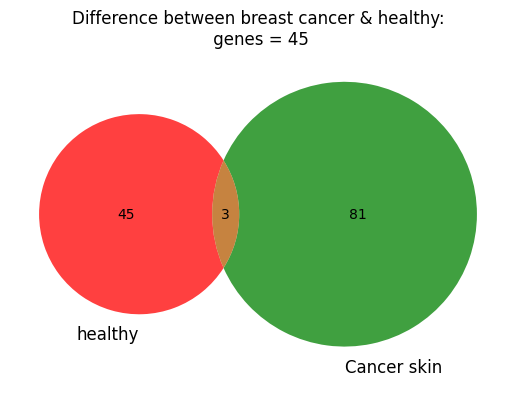

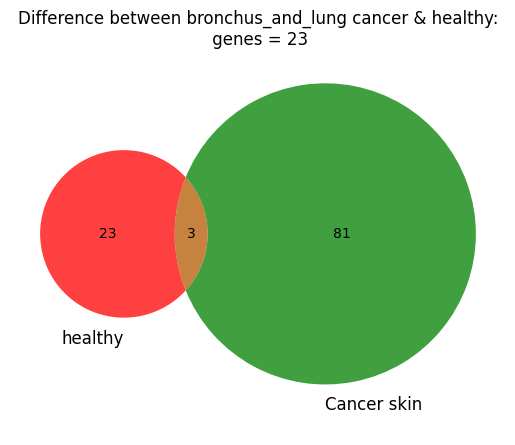

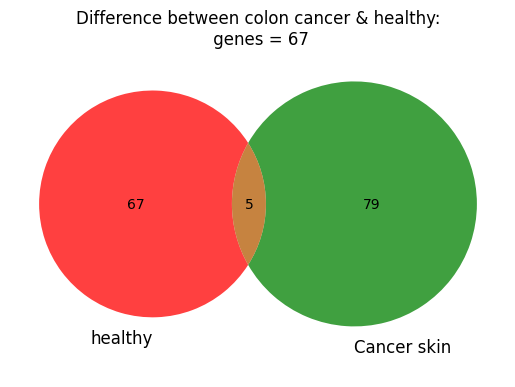

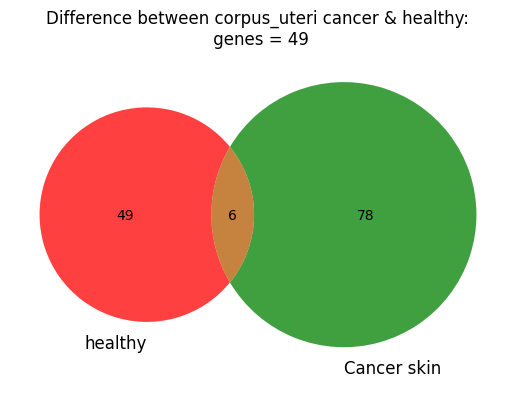

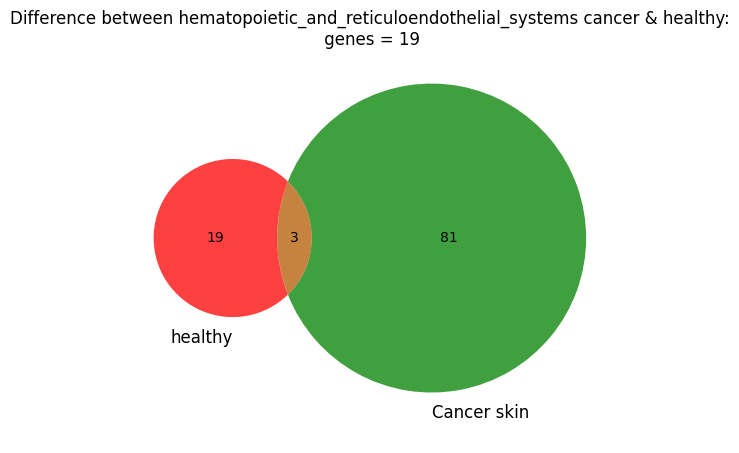

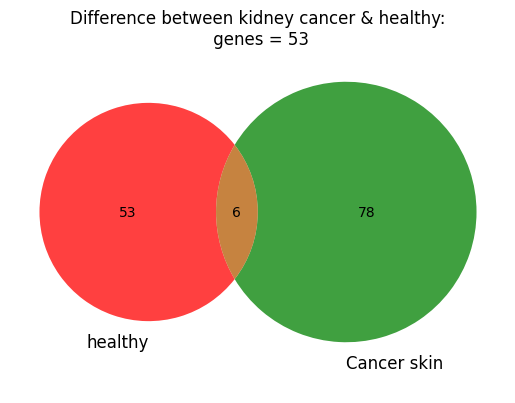

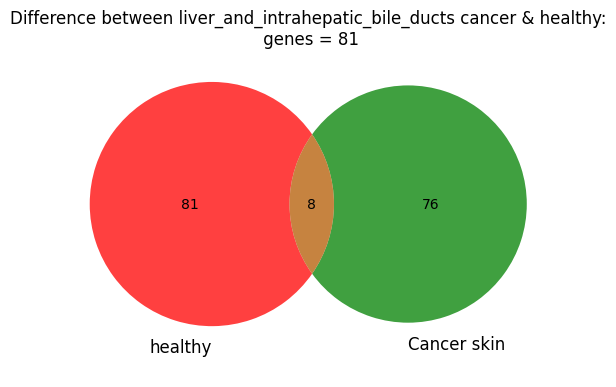

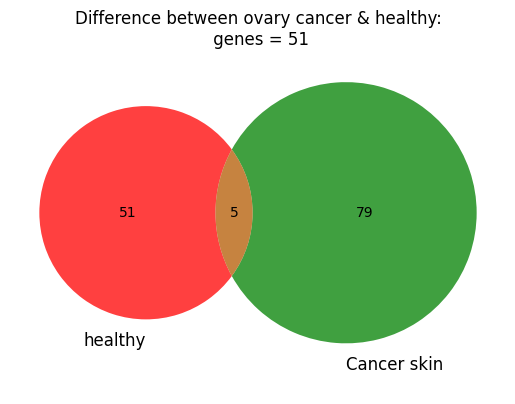

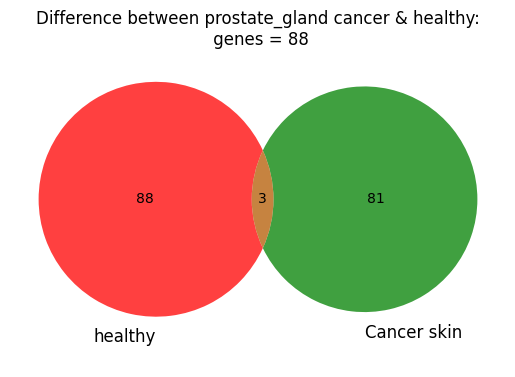

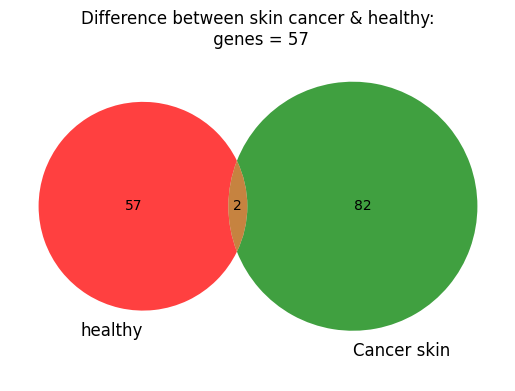

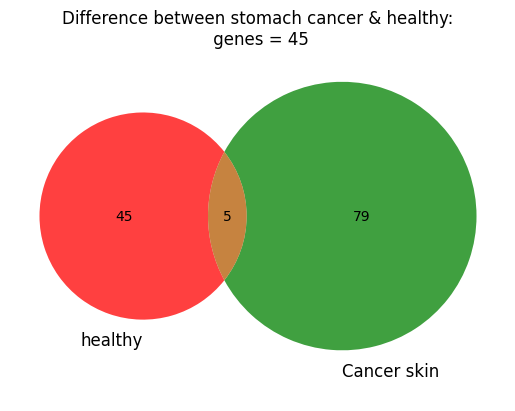

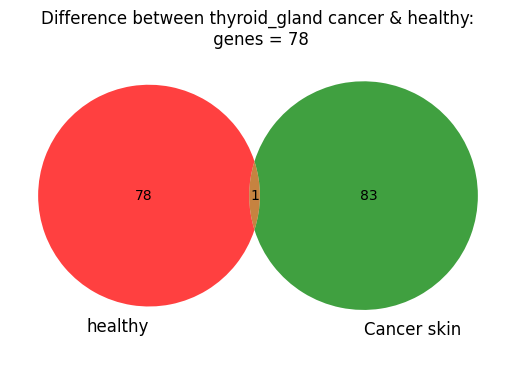

In [62]:
import json
!mkdir /content/gene
!mkdir /content/plots

treshhold = 0.3
treshhold1 = get_total_samples('healthy') * treshhold
healthy_genes = set(list(healthy_data['healthy'].loc[lambda x : x > treshhold1].to_dict().keys()))

for cancer_name, data in cancer_type_data.items():
  treshhold2 = get_total_samples(cancer_name) * treshhold
  cancer_genes = set(list(cancer_type_data[cancer_name].loc[lambda x : x > treshhold2].to_dict().keys()))
  intersect = (healthy_genes).intersection(cancer_genes)
  plt.title(f"Difference between {cancer_name} cancer & healthy:\n genes = {len(cancer_genes) - len(intersect)}")
  venn2([cancer_genes, healthy_genes],
        set_labels = ('healthy\n', 'Cancer skin \n'), alpha=0.75)
  plt.savefig(f'/content/plots/healthy_&_{cancer_name}_cancer.png')
  plt.show()
  with open(f"/content/gene/{cancer_name}.json", 'w') as f:
      json.dump(list(cancer_genes - intersect), f, indent=2)

In [ ]:
!zip -r "/content/drive/MyDrive/results/significant_genes.zip" "/content/gene"
!zip -r "/content/drive/MyDrive/results/intersection_genes.zip" "/content/plots"